In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("data_science_job.csv")

# Data Overview

In [56]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
16917,19452,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,5000-9999,Pvt Ltd,72.0,1.0
9099,22386,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,18.0,NaN,NaN,72.0,1.0
9273,7889,city_23,0.899,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,<10,Other,18.0,0.0
11571,23914,city_173,0.878,Male,Has relevent experience,no_enrollment,Masters,STEM,13.0,10000+,Pvt Ltd,25.0,0.0
13187,10003,city_103,0.920,Female,No relevent experience,no_enrollment,Masters,Humanities,3.0,NaN,NaN,21.0,0.0


# Checking the percentage of missing Data

In [57]:
df.isnull().sum()/len(df)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

# Fetching Columns suitable for CCA (Missing Data < 5%)

In [59]:
cols=[]
for col in df:
    if df[col].isnull().sum()/len(df)*100 <5 and df[col].isnull().sum()/len(df)*100 >0:
        cols.append(col)

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [18]:
#Percentage of data we left with after performing CCA
len(df[cols].dropna())/len(df)

0.8968577095730244

# Performing CCA

In [60]:
new_df=df[cols].dropna()
new_df.shape, df.shape

((17182, 5), (19158, 13))

# Data Distribution Before and After CCA

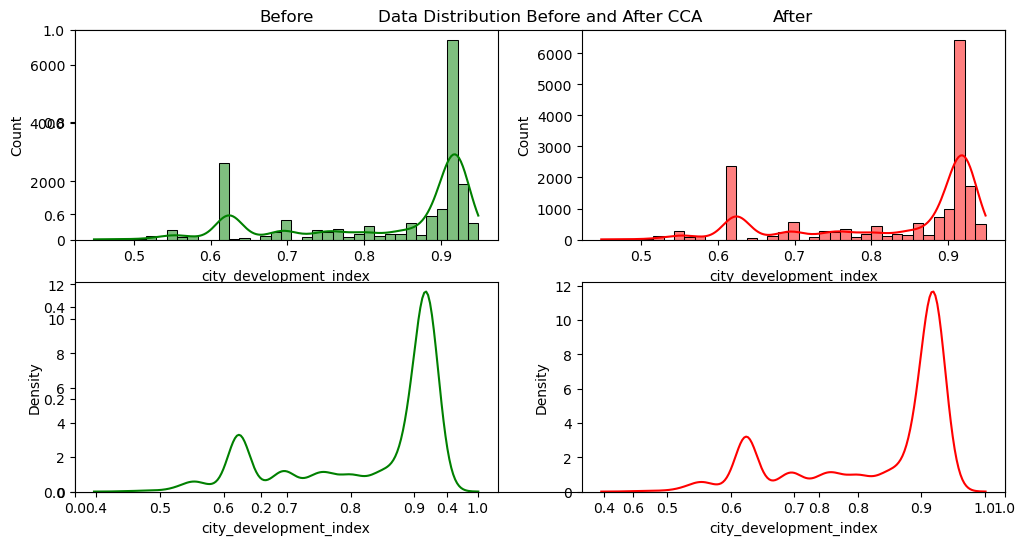

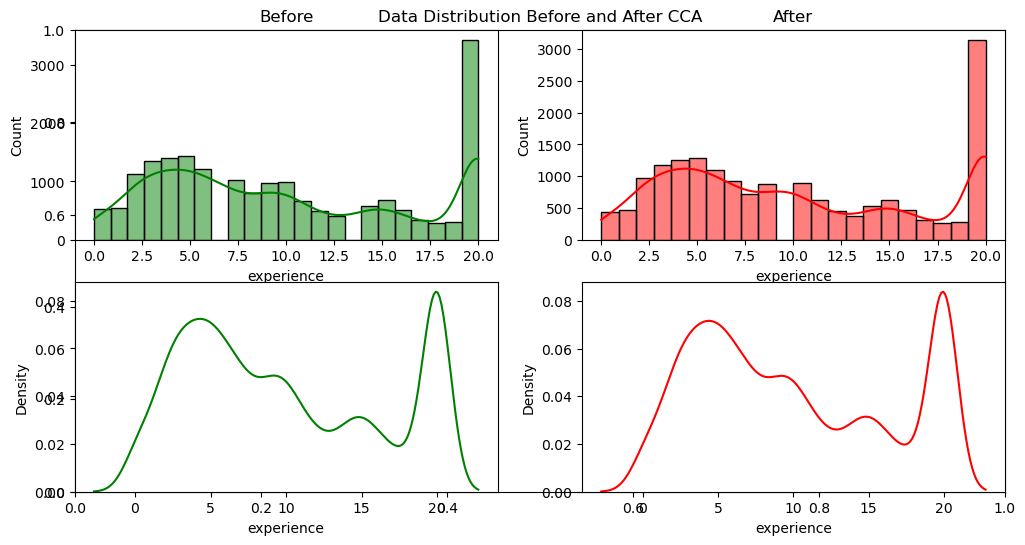

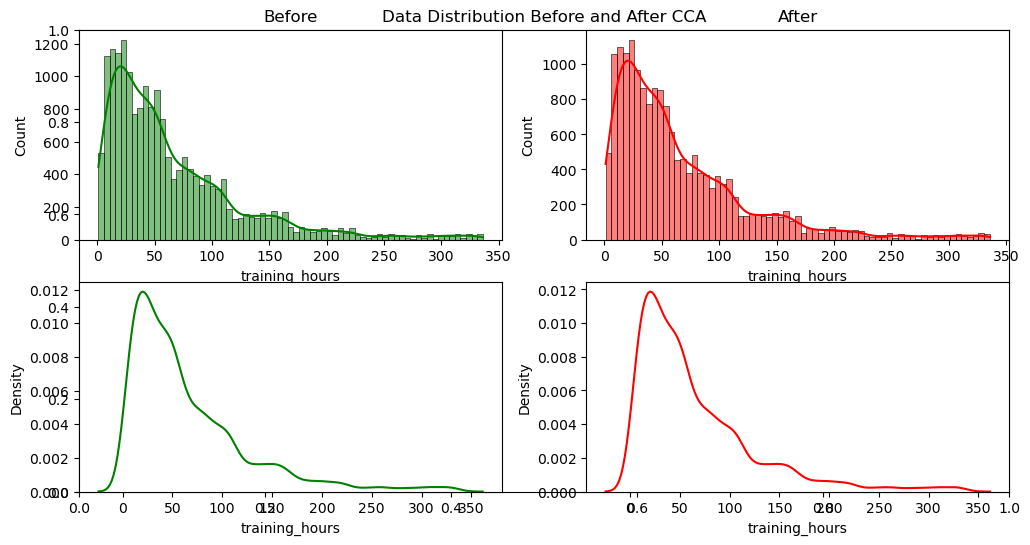

In [71]:
columns=["city_development_index","experience","training_hours"]

for col in columns:
    plt.figure(figsize=(12,6))
    plt.title("Data Distribution Before and After CCA")

    plt.subplot(2,2,1)
    sns.histplot(df[col],kde=True,color="green")
    plt.title("Before")

    plt.subplot(2,2,2)
    sns.histplot(new_df[col],kde=True,color="red")
    plt.title("After")

    plt.subplot(2,2,3)
    sns.kdeplot(x=df[col],color="green")

    plt.subplot(2,2,4)
    sns.kdeplot(x=new_df[col],color="red")
    

# Checking Data Ratio in Categorical Columns

In [74]:
#Checking for Education Level Column

temp=pd.concat([
    df["enrolled_university"].value_counts()/len(df),
    new_df["enrolled_university"].value_counts()/len(new_df)
],axis=1
)

temp.columns=["Orginal","CCA"]

temp

,Orginal,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [75]:
#Checking for Education Level Column

temp=pd.concat([
    df["education_level"].value_counts()/len(df),
    new_df["education_level"].value_counts()/len(new_df)
],axis=1
)

temp.columns=["Orginal","CCA"]

temp

,Orginal,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
